# Анализ выполненных задач в Jira

In [46]:
import pandas as pd
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from openpyxl import load_workbook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Будем работать только с выполненными задачами

In [47]:
wb = load_workbook('raw_data.xlsx')
ws = wb['general_report']
data = ws.values
columns = next(data)[0:]
df = pd.DataFrame(data, columns=columns)
df_done = df.loc[df['status'] == 'Выполнен']

##### Определяем длительность нахождения задачи в работе

In [48]:
df_done['task_duration'] = df_done.apply(lambda row: (row.resolution_date - row.created) / np.timedelta64(24, 'h'),
                                         axis=1)

C:\Users\antonova_yua\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Будем проводить анализ задач, которые были в работе не больше 60 дней

In [49]:
df_done_short_tasks = df_done.loc[df_done['task_duration'] < 60]

##### Общее количество задач в разрезе компонентов

In [53]:
df_tasks_count = df_done.groupby(by='component', as_index=False).agg({'id': pd.Series.nunique})
df_tasks_count = df_tasks_count.rename(columns = {"id": "tasks_count"}).sort_values(by=['tasks_count'], ascending=False)
df_tasks_count

,component,tasks_count
3,БД,297
1,Frontend,223
0,Backend,93
4,Верстка,71
2,Администрирование,23
5,Дизайн,22
6,Интеграция,4


##### Количество вполненных задач каждым разработчиком

In [54]:
# developers_components = df_done_long_tasks.loc[df['component'].isin(['Backend','Frontend', 'БД', 'Верстка'])]
developers_tasks = df_done_short_tasks.loc[df_done_short_tasks['component'].isin(['Backend','Frontend', 'БД', 'Верстка'])]
developers_tasks
developers = developers_tasks.groupby(by='developer', as_index=False).agg({'id': pd.Series.nunique})
developers = developers.rename(columns = {"id": "tasks_count"}).sort_values(by=['tasks_count'], ascending=False)
developers

,developer,tasks_count
6,Роман,138
3,Дмитрий Анатольевич,126
4,Дмитрий Юрьевич,124
5,Николай,85
0,Александр,53
2,Андрей Александрович,31
1,Андрей,17


##### Длительность и количество выполненных задач по компонентам

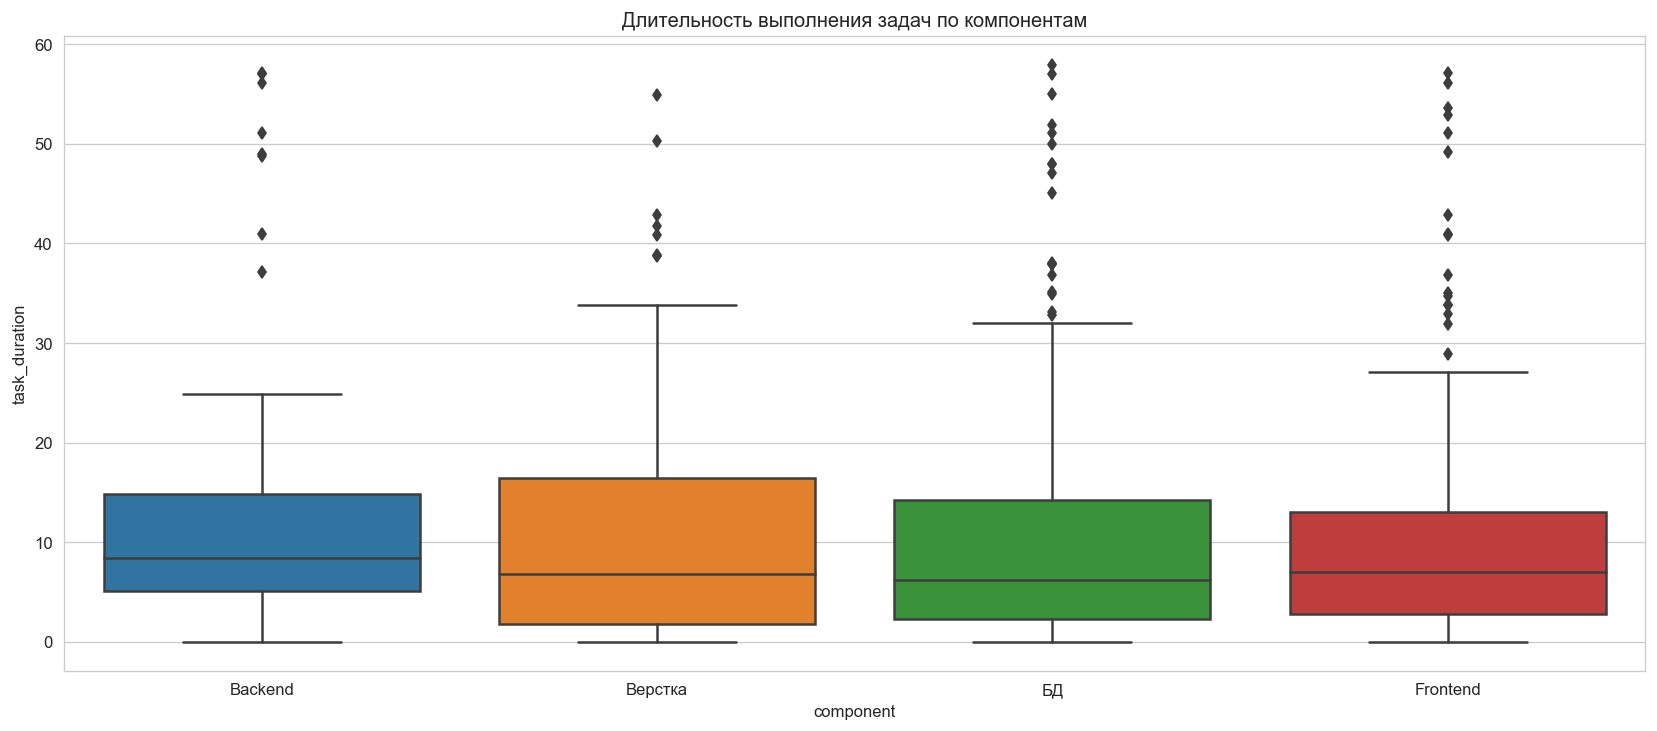

In [33]:
sns.set_style('whitegrid')
plt.figure(num=None, figsize=(17, 7), dpi=120)
plt.title('Длительность выполнения задач по компонентам')
sns.boxplot(x='component', y='task_duration', data = developers_tasks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275B4AEF608>,
      dtype=object)

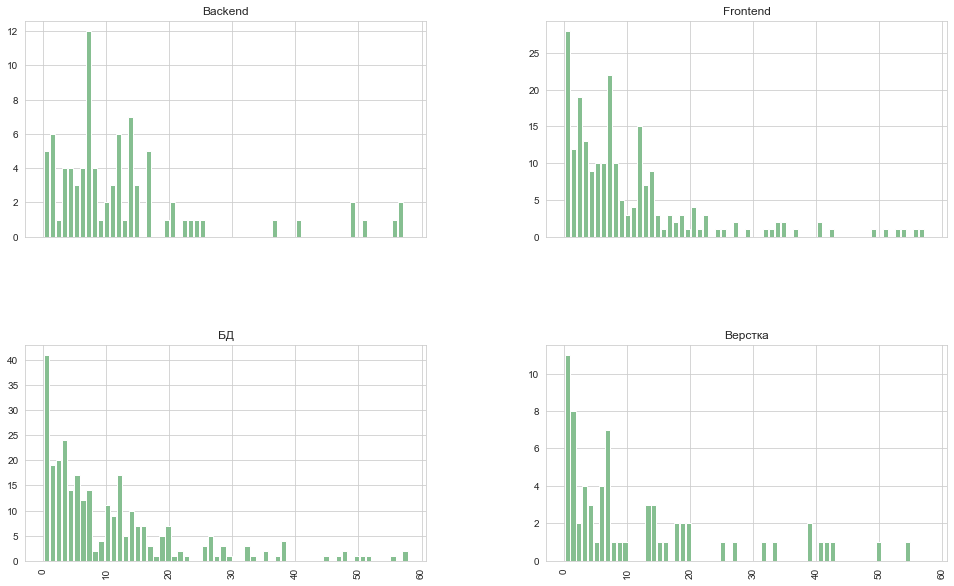

In [42]:
developers_tasks.hist(column='task_duration', by='component', bins=60, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)

## Анализ задач каждого из разработчиков

##### Разработчик Александр

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275AE4DAC48>,
      dtype=object)

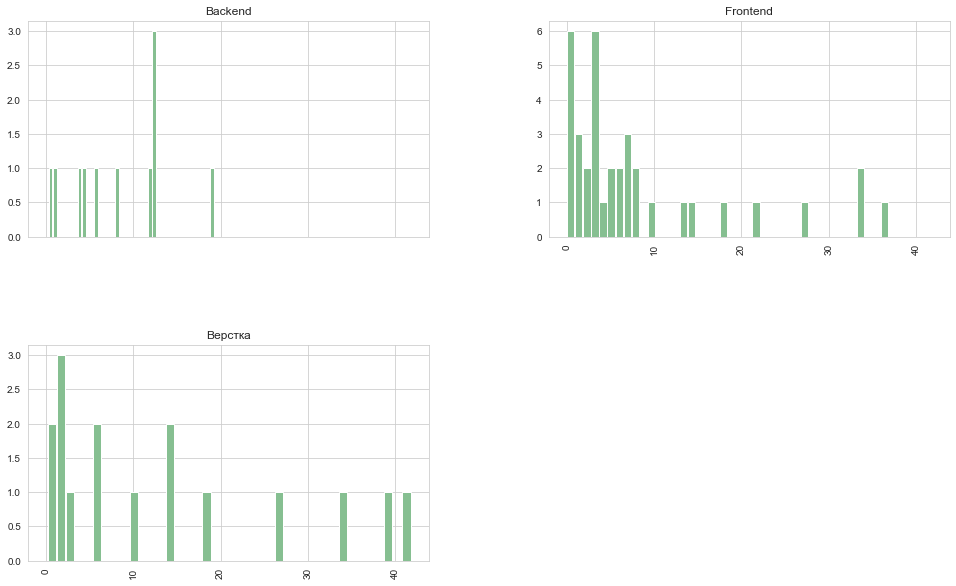

In [35]:
dev1_tasks = developers_tasks.loc[developers_tasks['developer'] == developers.loc[0,'developer']]
dev1_tasks.hist(column='task_duration', by='component', bins=40, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)

##### Разработчик Андрей Анатольевич

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275ADD76A48>,
      dtype=object)

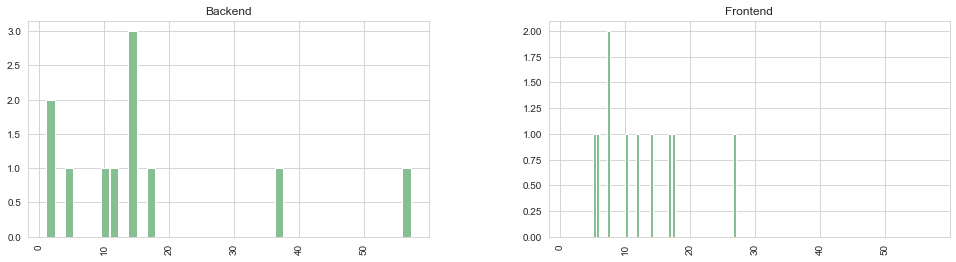

In [36]:
dev1_tasks = developers_tasks.loc[developers_tasks['developer'] == developers.loc[1,'developer']]
dev1_tasks.hist(column='task_duration', by='component', bins=40, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)

##### Разработчик Андрей Александрович

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275AE7C7608>,
      dtype=object)

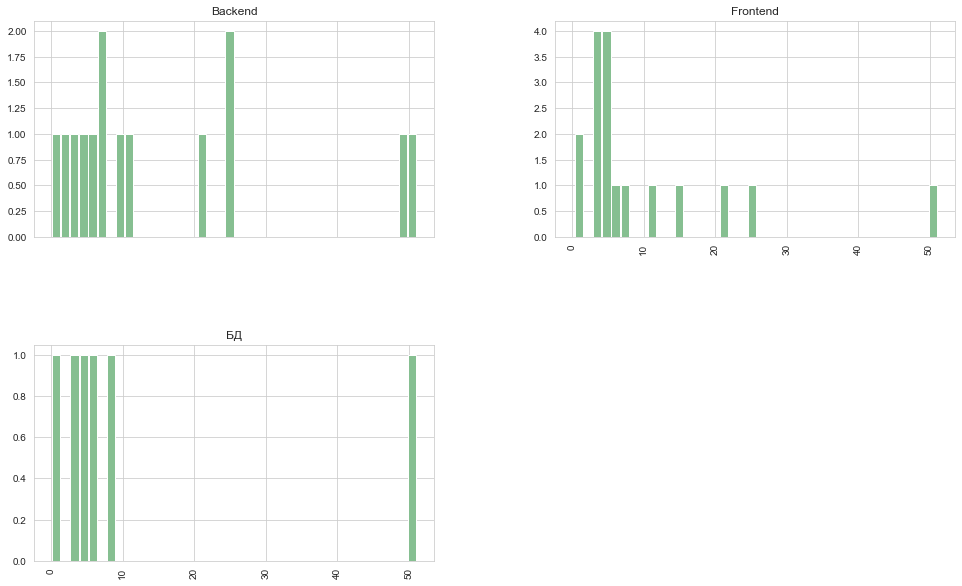

In [37]:
dev1_tasks = developers_tasks.loc[developers_tasks['developer'] == developers.loc[2,'developer']]
dev1_tasks.hist(column='task_duration', by='component', bins=40, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)

##### Разработчик Дмитрий Анатольевич

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275AE56B548>,
      dtype=object)

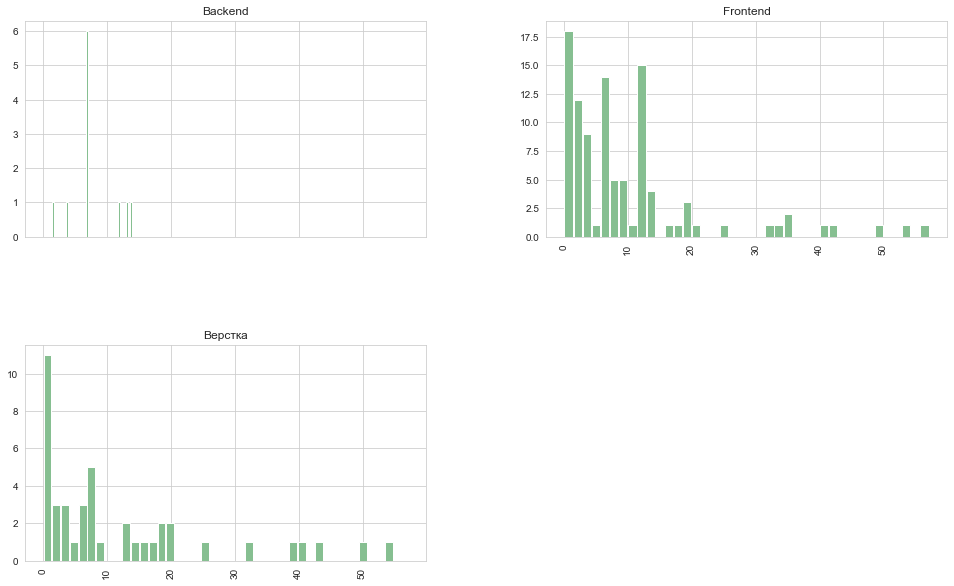

In [38]:
dev1_tasks = developers_tasks.loc[developers_tasks['developer'] == developers.loc[3,'developer']]
dev1_tasks.hist(column='task_duration', by='component', bins=40, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)

##### Разработчик Дмитрий Юрьевич

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275ADEF79C8>,
      dtype=object)

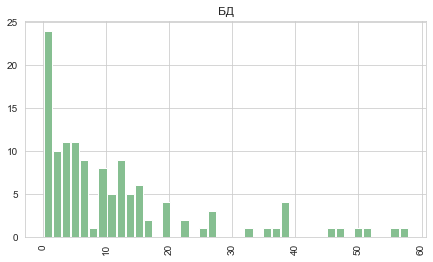

In [39]:
dev1_tasks = developers_tasks.loc[developers_tasks['developer'] == developers.loc[4,'developer']]
dev1_tasks.hist(column='task_duration', by='component', bins=40, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)

##### Разработчик Николай

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275B46AB7C8>,
      dtype=object)

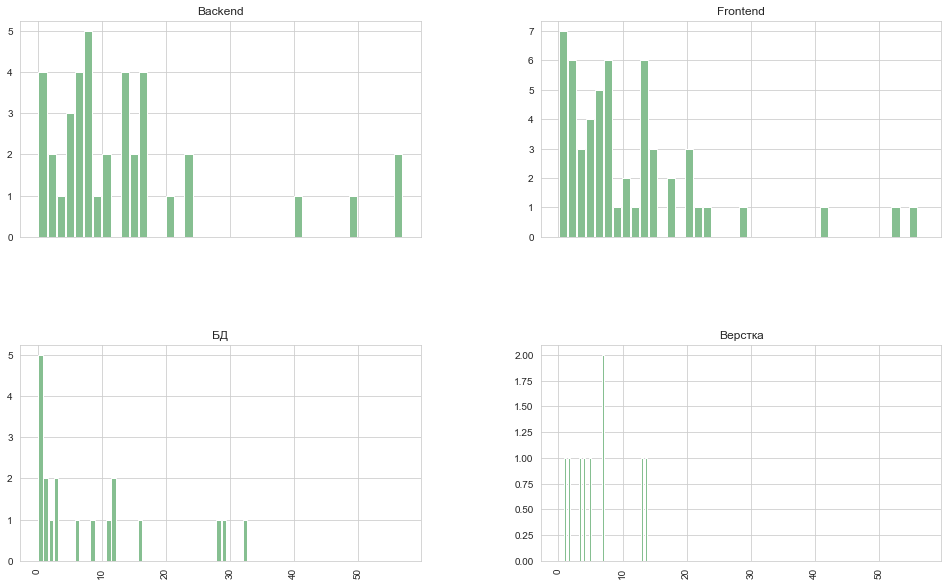

In [40]:
dev1_tasks = developers_tasks.loc[developers_tasks['developer'] == developers.loc[5,'developer']]
dev1_tasks.hist(column='task_duration', by='component', bins=40, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)

##### Разработчик Роман

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275AE680308>,
      dtype=object)

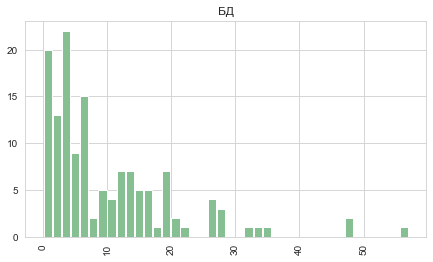

In [41]:
dev1_tasks = developers_tasks.loc[developers_tasks['developer'] == developers.loc[6,'developer']]
dev1_tasks.hist(column='task_duration', by='component', bins=40, layout=(2,2), grid=False, 
             figsize=(16,10), sharex=True, color='#86bf91', 
             zorder=10, rwidth=0.9)